In [ ]:
import pandas as pd

# Load dataset
data=pd.read_csv("/content/drive/MyDrive/final_dataset.csv")

In [ ]:
# Group by states and cities to find charging station counts
state_summary=data.groupby('State Name')['total-charging-stations'].sum().sort_values(ascending=False)

# Display top states
print("Top States by Charging Stations:")
print(state_summary.head())


Top States by Charging Stations:
State Name
Maharashtra    265.0
Tamil Nadu     183.0
Delhi          179.0
Karnataka      134.0
Kerala          94.0
Name: total-charging-stations, dtype: float64


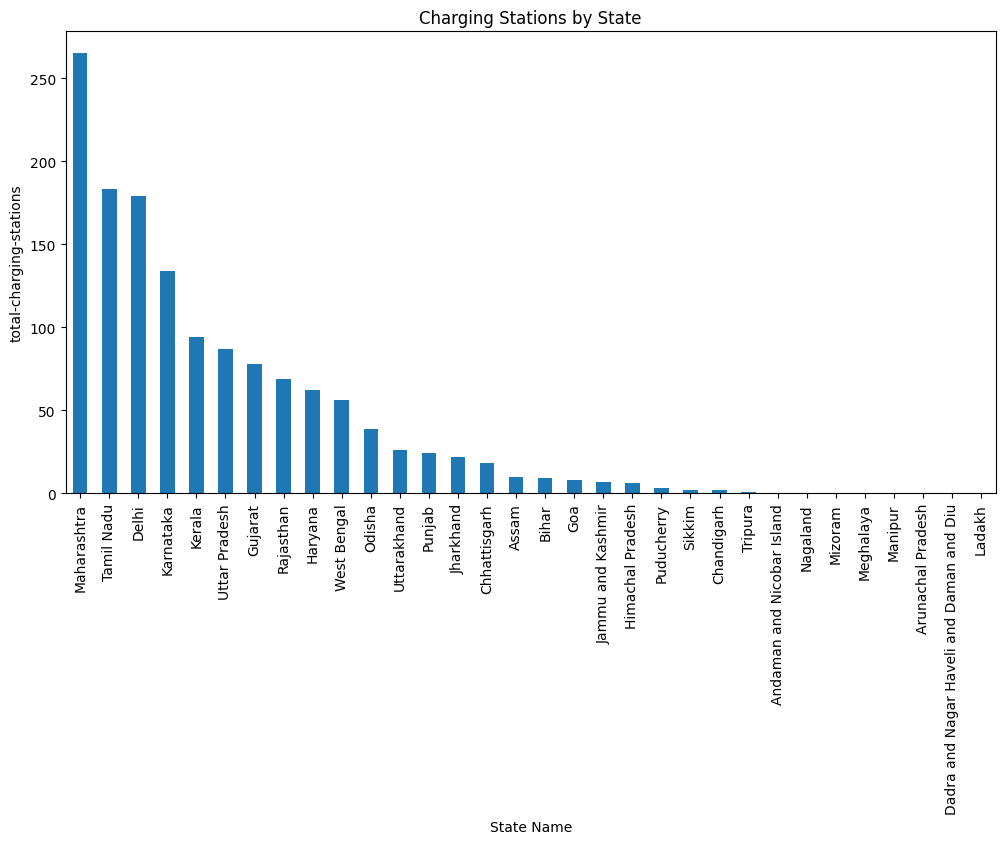

In [ ]:
import matplotlib.pyplot as plt

# Plot State Distribution
state_summary.plot(kind='bar',figsize=(12,6),title="Charging Stations by State")
plt.xlabel("State Name")
plt.ylabel("total-charging-stations")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Perform Principal Component Analysis(PCA)
numerical_cols= data.select_dtypes(include=['float64','int64']).columns

# Check if dataset has numerical columns
if not numerical_cols.empty:
  scaler=StandardScaler()
  scaled_data=scaler.fit_transform(data[numerical_cols])

# Check for NaNs or infinite values
print("Any NaN values:",np.isnan(scaled_data).any())

# Replace NaNs with the mean of each column
scaled_data=np.nan_to_num(scaled_data)

# Check for zero-variance features
variance=scaled_data.var(axis=0)
print("Variance in each feature:",variance)
print("Any zero-variance features:",(variance==0).any())

# Filter out zero-variance columns
scaled_data=scaled_data[:,variance>0]


# Apply PCA
pca=PCA(n_components=2)
pca_components=pca.fit_transform(scaled_data)
explained_variance=pca.explained_variance_ratio_
print("\nExplained Variance Ratio by PCA:")
print(explained_variance)


Any NaN values: True
Variance in each feature: [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.75]
Any zero-variance features: False

Explained Variance Ratio by PCA:
[0.30009435 0.15246733]


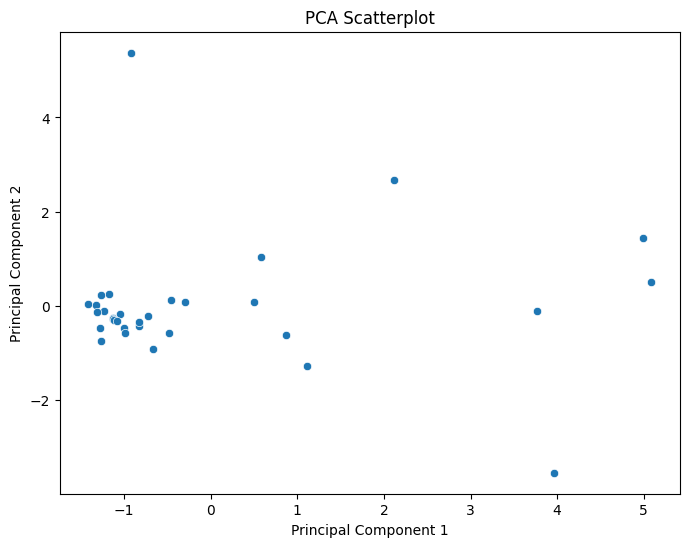

In [ ]:
import seaborn as sns

# Add PCA components to the dataset for Visualization
data['PCA1']=pca_components[:,0]
data['PCA2']=pca_components[:,1]

# Plot PCA Components
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['PCA1'],y=data['PCA2'])
plt.title("PCA Scatterplot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Perform Clustering
if not numerical_cols.empty:
  # K-Means Clustering
  kmeans=KMeans(n_clusters=3,random_state=42)
  data['Cluster']=kmeans.fit_predict(scaled_data)
  print("\nCluster Distribution:")
  print(data['Cluster'].value_counts())



Cluster Distribution:
Cluster
0    28
2     3
1     1
Name: count, dtype: int64


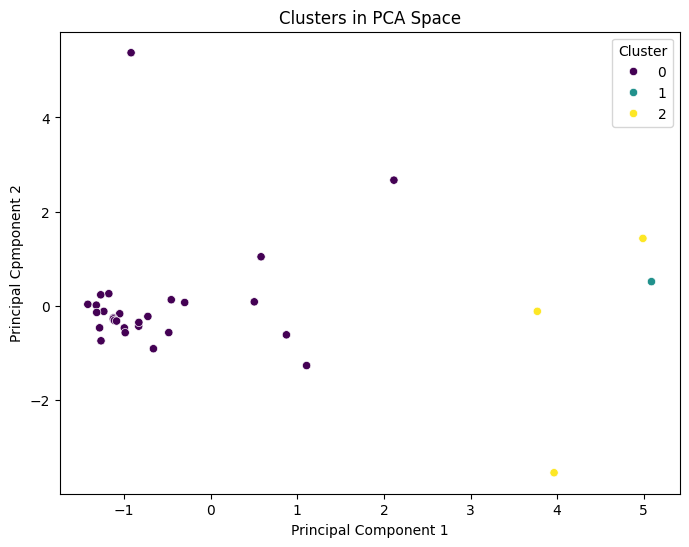

In [ ]:
# Visualize Clusters in PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['PCA1'],y=data['PCA2'],hue=data['Cluster'],palette="viridis")
plt.title("Clusters in PCA Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Cpmponent 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Save clustered data to a new CSV
output_file="segmented_data.csv"
data.to_csv(output_file,index=False)
print(f"\nSegmented dataset saved to {output_file}")


Segmented dataset saved to segmented_data.csv
